In [ ]:
"""
libraries verisons required
numpy==1.26.4
opencv-python==4.9.0.80
tensorflow
matplotlib
seaborn
scikit-learn
albumentations"""

# PART 1: DATA AUGMENTATION & PREPROCESSING

# Goal: Expand dataset size and split into Train/Val/Test

In [1]:
import os
import cv2
import random
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from albumentations import (
    Compose, Rotate, ShiftScaleRotate, RandomBrightnessContrast,
    GaussNoise, Blur, ElasticTransform
)
from tqdm import tqdm

# Input folder
DATASET_DIR = r"C:\Users\bharath hs\Downloads\numbers"# dataset path

# Output folder (Moved OUTSIDE the input folder to prevent errors)
OUTPUT_DIR = r"C:\Users\bharath hs\Downloads\numbers_processed_final"# add path for where new datset folder should be created

# 2. CREATE AUGMENTATION PIPELINE
augment = Compose([
    Rotate(limit=25, p=0.9),
    ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=25, p=0.9),
    RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.9),
    GaussNoise(var_limit=(10, 50), p=0.7),
    Blur(blur_limit=3, p=0.5),
    ElasticTransform(alpha=20, sigma=5, alpha_affine=10, p=0.5)
])

# 3. CREATE OUTPUT STRUCTURE
# Clean old run if it exists to avoid duplicates
if os.path.exists(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)
    print(f"Cleaned up old directory: {OUTPUT_DIR}")

for split in ["train", "val", "test"]:
    # We don't know classes yet, so we make the base split folders first
    os.makedirs(os.path.join(OUTPUT_DIR, split), exist_ok=True)

# 4. PROCESS EACH CLASS
# Get valid classes (folders only)
classes = [d for d in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, d))]
classes.sort()

print(f"Found classes: {classes}")

for class_name in classes:
    class_path = os.path.join(DATASET_DIR, class_name)
    print(f"\nProcessing Class: {class_name}")

    # Create class folders in output
    for split in ["train", "val", "test"]:
        os.makedirs(os.path.join(OUTPUT_DIR, split, class_name), exist_ok=True)

    # Load all images
    images = []
    file_list = os.listdir(class_path)
    
    for file in file_list:
        # valid extensions check
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            img_path = os.path.join(class_path, file)
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)

    original_count = len(images)
    print(f"  Original images loaded: {original_count}")

    if original_count == 0:
        print(f"  Skipping {class_name} (empty)")
        continue

    # AUGMENT 
    augmented_images = []
    
    # If very few images, might want to augment more
    for img in tqdm(images, desc=f"  Augmenting {class_name}"):
        for _ in range(10): 
            try:
                aug = augment(image=img)["image"]
                augmented_images.append(aug)
            except Exception as e:
                pass # skip failed augmentations

    # Combine
    all_data = images + augmented_images
    total_imgs = len(all_data)
    print(f"  Total after augmentation: {total_imgs}")

    # SPLIT
    # Handle cases with very few images safely
    if total_imgs < 5:
        print("  Not enough images to split. Copying all to train.")
        train, val, test = all_data, [], []
    else:
        train, temp = train_test_split(all_data, test_size=0.30, random_state=42)
        val, test = train_test_split(temp, test_size=0.50, random_state=42)

    # SAVE
    def save_images(img_list, split_name):
        for i, im in enumerate(img_list):
            # Unique filename: class_split_index.png
            filename = f"{class_name}_{i}.png"
            save_path = os.path.join(OUTPUT_DIR, split_name, class_name, filename)
            cv2.imwrite(save_path, im)

    save_images(train, "train")
    save_images(val, "val")
    save_images(test, "test")

print(f"\nAll Done! Dataset saved to: {OUTPUT_DIR}")

C:\Users\bharath hs\AppData\Roaming\Python\Python311\site-packages\albumentations\core\validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
C:\Users\bharath hs\AppData\Local\Temp\ipykernel_10744\2956745123.py:29: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  GaussNoise(var_limit=(10, 50), p=0.7),
C:\Users\bharath hs\AppData\Local\Temp\ipykernel_10744\2956745123.py:31: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  ElasticTransform(alpha=20, sigma=5, alpha_affine=10, p=0.5)


Found classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Processing Class: 0
  Original images loaded: 26


  Augmenting 0: 100%|██████████████████████████████████████████████████████████████████| 26/26 [00:32<00:00,  1.24s/it]


  Total after augmentation: 286

Processing Class: 1
  Original images loaded: 36


  Augmenting 1: 100%|██████████████████████████████████████████████████████████████████| 36/36 [00:48<00:00,  1.34s/it]


  Total after augmentation: 396

Processing Class: 2
  Original images loaded: 33


  Augmenting 2: 100%|██████████████████████████████████████████████████████████████████| 33/33 [01:01<00:00,  1.88s/it]


  Total after augmentation: 363

Processing Class: 3
  Original images loaded: 32


  Augmenting 3: 100%|██████████████████████████████████████████████████████████████████| 32/32 [00:45<00:00,  1.42s/it]


  Total after augmentation: 352

Processing Class: 4
  Original images loaded: 29


  Augmenting 4: 100%|██████████████████████████████████████████████████████████████████| 29/29 [00:37<00:00,  1.29s/it]


  Total after augmentation: 319

Processing Class: 5
  Original images loaded: 31


  Augmenting 5: 100%|██████████████████████████████████████████████████████████████████| 31/31 [01:00<00:00,  1.96s/it]


  Total after augmentation: 341

Processing Class: 6
  Original images loaded: 34


  Augmenting 6: 100%|██████████████████████████████████████████████████████████████████| 34/34 [01:09<00:00,  2.04s/it]


  Total after augmentation: 374

Processing Class: 7
  Original images loaded: 39


  Augmenting 7: 100%|██████████████████████████████████████████████████████████████████| 39/39 [01:07<00:00,  1.73s/it]


  Total after augmentation: 429

Processing Class: 8
  Original images loaded: 38


  Augmenting 8: 100%|██████████████████████████████████████████████████████████████████| 38/38 [01:09<00:00,  1.83s/it]


  Total after augmentation: 418

Processing Class: 9
  Original images loaded: 37


  Augmenting 9: 100%|██████████████████████████████████████████████████████████████████| 37/37 [01:05<00:00,  1.76s/it]


  Total after augmentation: 407

All Done! Dataset saved to: C:\Users\bharath hs\Downloads\numbers_processed_final


# PART 2: MODEL ARCHITECTURE & TRAINING
# Goal: Build CNN, train on data, and save .h5 model

Memory cleared.
Loading Data...
Classes found: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Building Model...

Starting Training...
Epoch 1/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 33s 115ms/step - accuracy: 0.1220 - loss: 2.3005 - val_accuracy: 0.1558 - val_loss: 2.2897
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.1405 - loss: 2.2880 - val_accuracy: 0.1703 - val_loss: 2.2163
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.2673 - loss: 2.1305 - val_accuracy: 0.4094 - val_loss: 1.7756
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.3976 - loss: 1.7634 - val_accuracy: 0.4366 - val_loss: 1.5973
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4605 - loss: 1.5656 - val_accuracy: 0.5000 - val_loss: 1.4722
Epoch 6/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5117 - loss: 1.4579 - val_accuracy: 0.5018 - val_loss: 1.4131
Epoch 7/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5225 - loss: 1.4143 - val_accurac


Saved model.


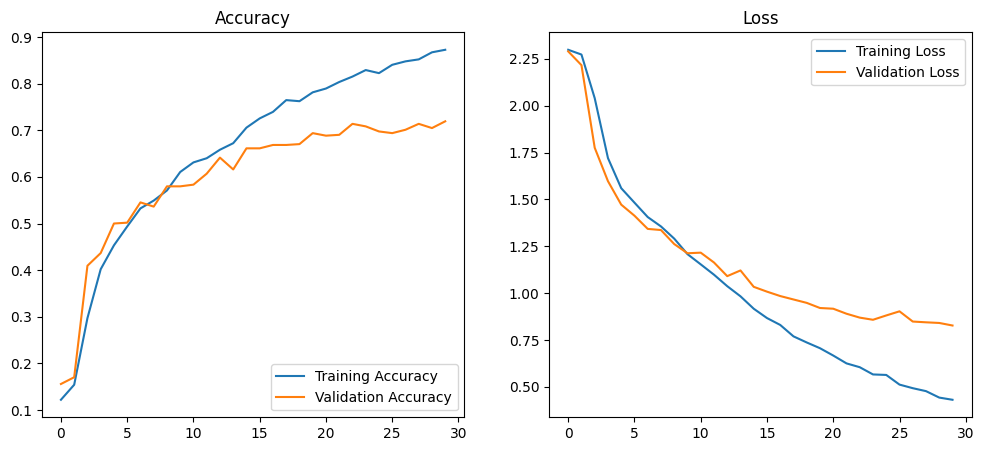

In [15]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers

tf.keras.backend.clear_session()
print("Memory cleared.")

DATASET_PATH = r"C:\Users\bharath hs\Downloads\numbers_processed_final"
IMG_SIZE = 64
BATCH_SIZE = 32

# 2. LOAD DATA
print("Loading Data...")
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATASET_PATH, 'train'),
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    seed=123,
    verbose=0
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATASET_PATH, 'val'),
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    seed=123,
    verbose=0
)

# SAVE CLASS NAMES 
class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Classes found: {class_names}")

# Optimize
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# 3. BUILD STABLE MODEL
print("Building Model...")
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    
    # Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Layer 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Layer 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2), 
    
    # Classification
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax') 
])

# 4. TRAIN 
# Low learning rate to fix "Mode Collapse"
optimizer = optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nStarting Training...")
history = model.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=30, 
    verbose=1
)

# Save
model.save("my_digit_model_fixed.h5")
print("\nSaved model.")

# 5. PLOT GRAPHS
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

# PART 3: TESTING

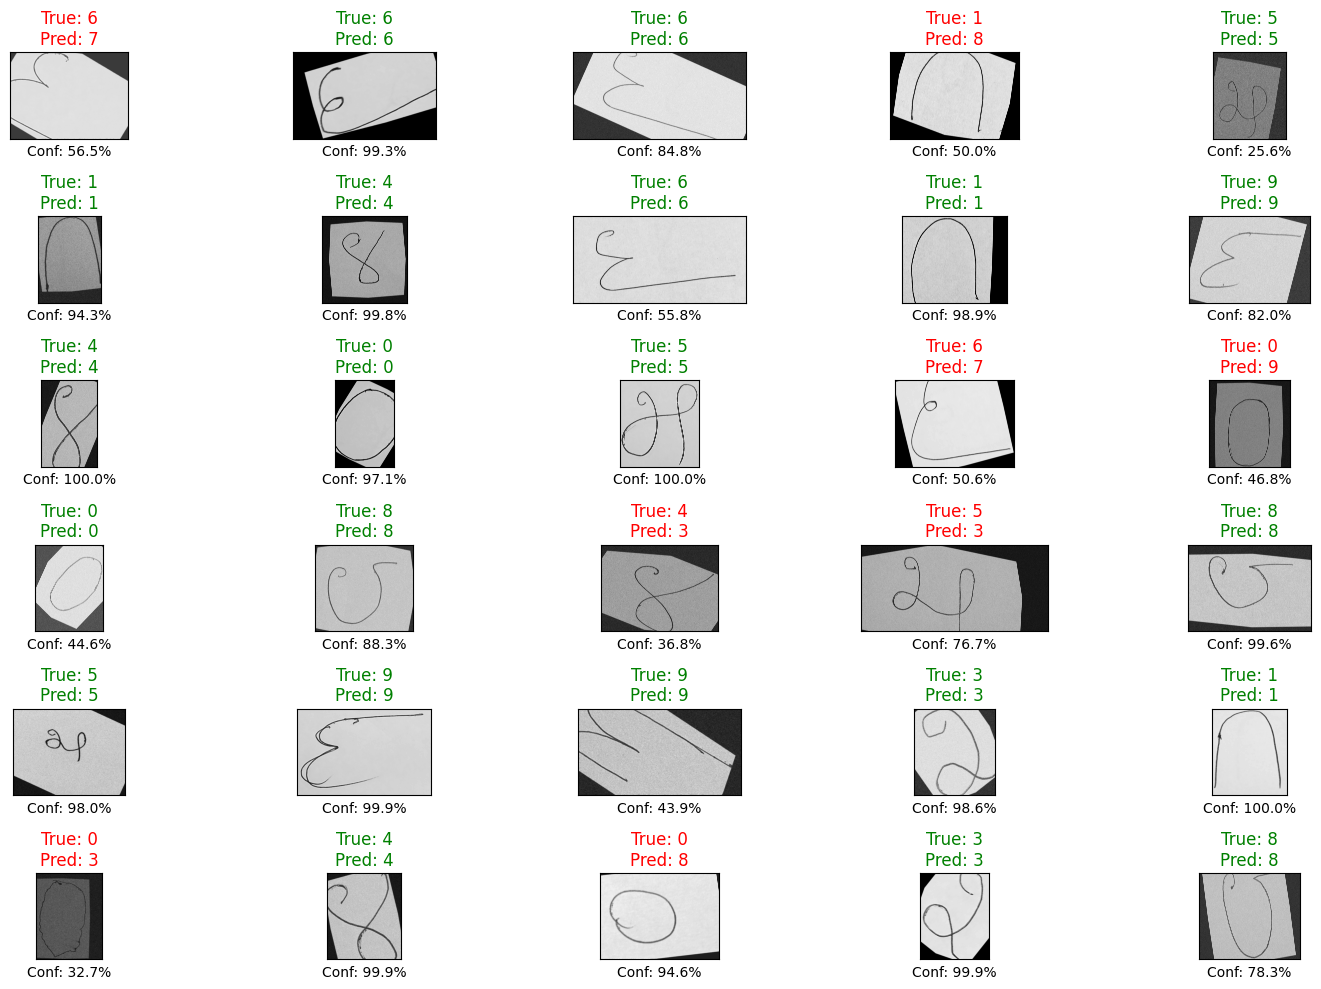

In [19]:
import os
import random
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. LOAD MODEL
DATASET_PATH = r"C:\Users\bharath hs\Downloads\numbers_processed_final"
model = tf.keras.models.load_model("my_digit_model_fixed.h5")

# Get class names
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATASET_PATH, 'train'),
    image_size=(64, 64),
    batch_size=32,
    color_mode='grayscale',
    seed=123,
    verbose=0
)
class_names = train_ds.class_names

# 2. GATHER TEST IMAGES
test_dir = os.path.join(DATASET_PATH, 'test')
all_test_images = []
for c in class_names:
    c_path = os.path.join(test_dir, c)
    if os.path.isdir(c_path):
        for f in os.listdir(c_path):
            all_test_images.append((c, os.path.join(c_path, f)))

# Pick 30 random
selected_samples = random.sample(all_test_images, 30)

plt.figure(figsize=(15, 10))

for i, (true_label, img_path) in enumerate(selected_samples):
    # Process
    img_original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img_original, (64, 64))
    
    img_input = img_resized.astype("float32") 
    
    img_input = np.expand_dims(img_input, axis=-1)
    img_input = np.expand_dims(img_input, axis=0)

    # Predict
    pred = model.predict(img_input, verbose=0)
    pred_idx = np.argmax(pred)
    pred_label = class_names[pred_idx]
    confidence = np.max(pred) * 100

    # Visuals
    color = 'green' if true_label == pred_label else 'red'
    
    plt.subplot(6, 5, i+1)
    plt.imshow(img_original, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color, fontsize=12)
    plt.xlabel(f"Conf: {confidence:.1f}%")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

# PART 4: REAL-TIME WEBCAM DETECTION
# Goal: Detect digits live 

In [4]:
import cv2
import os
import numpy as np
import tensorflow as tf

# 1. LOAD THE MODEL
model = tf.keras.models.load_model("my_digit_model_fixed.h5")

# Get class names (Manually listing them is safer for standalone scripts)
class_names = sorted(os.listdir(r"C:\Users\bharath hs\Downloads\numbers_processed_final\train"))
print(f"Loaded Model. Classes: {class_names}")

# 2. START WEBCAM
cap = cv2.VideoCapture(0) # 0 is usually the default laptop camera

# Font settings
font = cv2.FONT_HERSHEY_SIMPLEX

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # We will draw a green box in the center. Put number inside this box.
    height, width, _ = frame.shape
    x1, y1 = int(width/2 - 100), int(height/2 - 100)
    x2, y2 = int(width/2 + 100), int(height/2 + 100)
    
    # Draw the box on the screen
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # 4. EXTRACT & PROCESS THE ROI
    roi = frame[y1:y2, x1:x2]
    
    if roi.size > 0:
        # Preprocessing steps - EXACTLY matching training
        # A. Convert to Grayscale
        gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        
        # B. Resize to 64x64
        resized = cv2.resize(gray_roi, (64, 64))
        
        # C. Normalize (No division by 255, remember!)
        img_input = resized.astype("float32")
        img_input = np.expand_dims(img_input, axis=-1) # (64, 64, 1)
        img_input = np.expand_dims(img_input, axis=0)  # (1, 64, 64, 1)

        # 5. PREDICT
        preds = model.predict(img_input, verbose=0)
        pred_idx = np.argmax(preds)
        confidence = np.max(preds) * 100
        pred_label = class_names[pred_idx]

        # 6. DISPLAY RESULT
        # Only show if confidence is decent (> 50%)
        color = (0, 255, 0) if confidence > 50 else (0, 0, 255)
        text = f"{pred_label} ({int(confidence)}%)"
        
        # Display text above the box
        cv2.putText(frame, text, (x1, y1 - 10), font, 1, color, 2)
        
        # Optional: Show what the model sees in the corner
        cv2.imshow("Model Input", resized)

    # Show the main camera feed
    cv2.imshow("Digit Recognizer (Press 'q' to quit)", frame)

    # Quit on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Loaded Model. Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
